In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
sns.set()

In [26]:
df_adhd200_KKI = pd.read_csv("results/protopnet/ADHD200/KKI/group_results.csv")
df_adhd200_KKI["Site"] = ["KKI"]*df_adhd200_KKI.shape[0]
df_adhd200_NeuroIMAGE = pd.read_csv("results/protopnet/ADHD200/NeuroIMAGE/group_results.csv")
df_adhd200_NeuroIMAGE["Site"] = ["NeuroIMAGE"]*df_adhd200_NeuroIMAGE.shape[0]
df_adhd200_NYU = pd.read_csv("results/protopnet/ADHD200/NYU/group_results.csv")
df_adhd200_NYU["Site"] = ["NYU"]*df_adhd200_NYU.shape[0]
df_adhd200_OHSU = pd.read_csv("results/protopnet/ADHD200/OHSU/group_results.csv")
df_adhd200_OHSU["Site"] = ["OHSU"]*df_adhd200_OHSU.shape[0]
df_adhd200_Peking = pd.read_csv("results/protopnet/ADHD200/Peking/group_results.csv")
df_adhd200_Peking["Site"] = ["Peking"]*df_adhd200_Peking.shape[0]
df_adhd200_Pittsburgh = pd.read_csv("results/protopnet/ADHD200/Pittsburgh/group_results.csv")
df_adhd200_Pittsburgh["Site"] = ["Pittsburg"]*df_adhd200_Pittsburgh.shape[0]
df_adhd200_WashU = pd.read_csv("results/protopnet/ADHD200/WashU/group_results.csv")
df_adhd200_WashU["Site"] = ["WashU"]*df_adhd200_WashU.shape[0]


In [27]:
df_adhd200 = pd.concat([df_adhd200_KKI, df_adhd200_NeuroIMAGE, df_adhd200_NYU, df_adhd200_OHSU,
                       df_adhd200_Peking, df_adhd200_Pittsburgh, df_adhd200_WashU], axis=0)

In [28]:
# df_adhd200.to_csv("/media/mleanie/SAMSUNG/protopnet_results/ADHD200/group_all_results.csv")
# df_adhd200.to_csv("./adhd200_group_all_results.csv")

# Inspect prototypes selected for 100 scans

In [29]:
df_local_annotations = pd.read_csv("annotations/local_annotations.csv")

In [30]:
df_local_annotations.columns

Index(['globally bad, combination of all effects',
       'bad ringing/im sharpness but medium cnr', 'CNR medium',
       'local erasement', 'local ringing', 'medium to bad image sharpness',
       'CNR good'],
      dtype='object')

In [31]:
all_subids_locally_annotated = df_local_annotations['globally bad, combination of all effects'].value_counts().index.tolist()
all_subids_locally_annotated = all_subids_locally_annotated + df_local_annotations['bad ringing/im sharpness but medium cnr'].value_counts().index.tolist()
all_subids_locally_annotated = all_subids_locally_annotated + df_local_annotations['CNR medium'].value_counts().index.tolist()
all_subids_locally_annotated = all_subids_locally_annotated + df_local_annotations['local erasement'].value_counts().index.tolist()
all_subids_locally_annotated = all_subids_locally_annotated + df_local_annotations['local ringing'].value_counts().index.tolist()
all_subids_locally_annotated = all_subids_locally_annotated + df_local_annotations['medium to bad image sharpness'].value_counts().index.tolist()
all_subids_locally_annotated = all_subids_locally_annotated + df_local_annotations['CNR good'].value_counts().index.tolist()
all_subids_locally_annotated = all_subids_locally_annotated + pd.read_csv("annotations/subids_less_damaged.csv", header=None)[0].tolist()

all_subids_locally_annotated = list(set(all_subids_locally_annotated))

In [32]:
len(all_subids_locally_annotated)

422

In [33]:
subids_local_ringing = df_local_annotations["local ringing"].value_counts().index

In [34]:
subids_local_erasement = df_local_annotations["local erasement"].value_counts().index

In [35]:
subids_local_ringing_or_erasement = list(set(subids_local_ringing) | set(subids_local_erasement))

In [36]:
subids_globally_bad = df_local_annotations['globally bad, combination of all effects'].value_counts().index

In [37]:
len(df_local_annotations["bad ringing/im sharpness but medium cnr"].value_counts().index)

62

In [38]:
len(df_local_annotations["CNR medium"].value_counts().index)

39

In [39]:
len(df_local_annotations["medium to bad image sharpness"].value_counts().index)

39

In [40]:
len(df_local_annotations["CNR good"].value_counts().index)

26

In [41]:
len(df_local_annotations["bad ringing/im sharpness but medium cnr"].value_counts().index)

62

In [42]:
subids_globally_medium_damaged = df_local_annotations["bad ringing/im sharpness but medium cnr"].value_counts().index
subids_globally_medium_damaged = list(set(subids_globally_medium_damaged).difference(set(subids_local_ringing_or_erasement)))

In [43]:
# pd.DataFrame(subids_local_ringing_or_erasement).to_csv("./subids_local_ringing_or_erasement.csv", header=False, index=False)

In [44]:
# pd.DataFrame(subids_globally_medium_damaged).to_csv("./subids_globally_medium_damaged.csv", header=False, index=False)

# Train

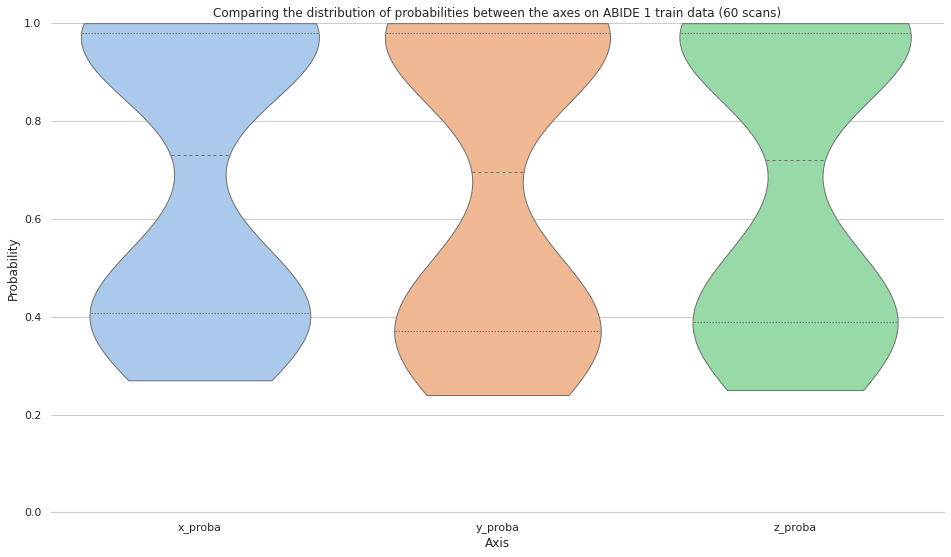

In [45]:
path = "results/protopnet/train_full/resnet152/19112020/10push0.8167.pth/"

df_group_train = pd.read_csv(os.path.join(path, "group_results.csv"))

# Distribution of x_proba, y_proba, z_proba
data = pd.melt(df_group_train[['x_proba', 'y_proba', 'z_proba']])
plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid", palette="pastel")
sns.violinplot(data=data, x="variable", y="value",
               split=True, inner="quart", linewidth=1, cut=0)
sns.despine(left=True)
plt.title("Comparing the distribution of probabilities between the axes on ABIDE 1 train data (60 scans)")
plt.xlabel("Axis")
plt.ylabel("Probability")
plt.ylim(0, 1)

df_group_train["dataset"] = ["train"]*df_group_train.shape[0]

# Val

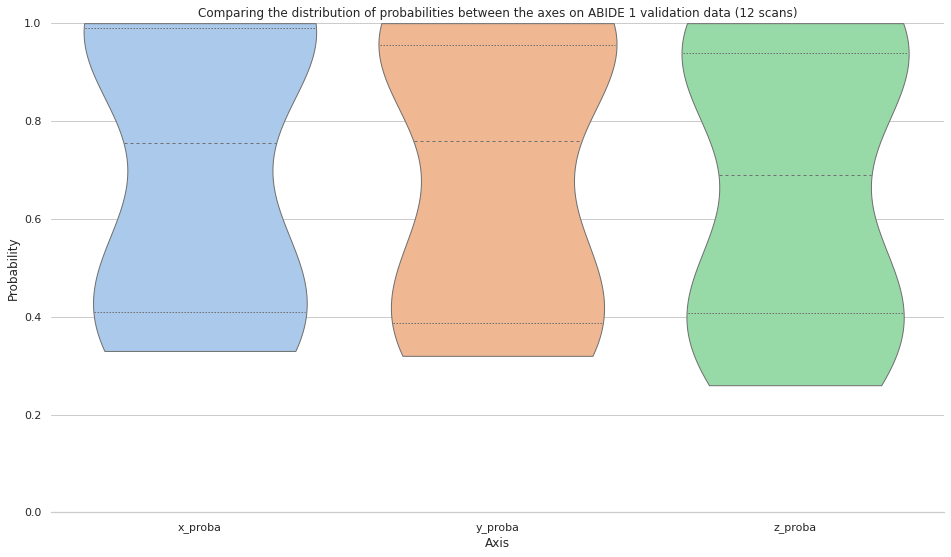

In [46]:
path = "results/protopnet/val_full/resnet152/19112020/10push0.8167.pth/"
df_group_val = pd.read_csv(os.path.join(path, "group_results.csv"))

# Distribution of x_proba, y_proba, z_proba
data = pd.melt(df_group_val[['x_proba', 'y_proba', 'z_proba']])
plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid", palette="pastel")
sns.violinplot(data=data, x="variable", y="value",
               split=True, inner="quart", linewidth=1, cut=0)
sns.despine(left=True)
plt.title("Comparing the distribution of probabilities between the axes on ABIDE 1 validation data (12 scans)")
plt.xlabel("Axis")
plt.ylabel("Probability")
plt.ylim(0, 1)

df_group_val["dataset"] = ["val"]*df_group_val.shape[0]

# Testset1

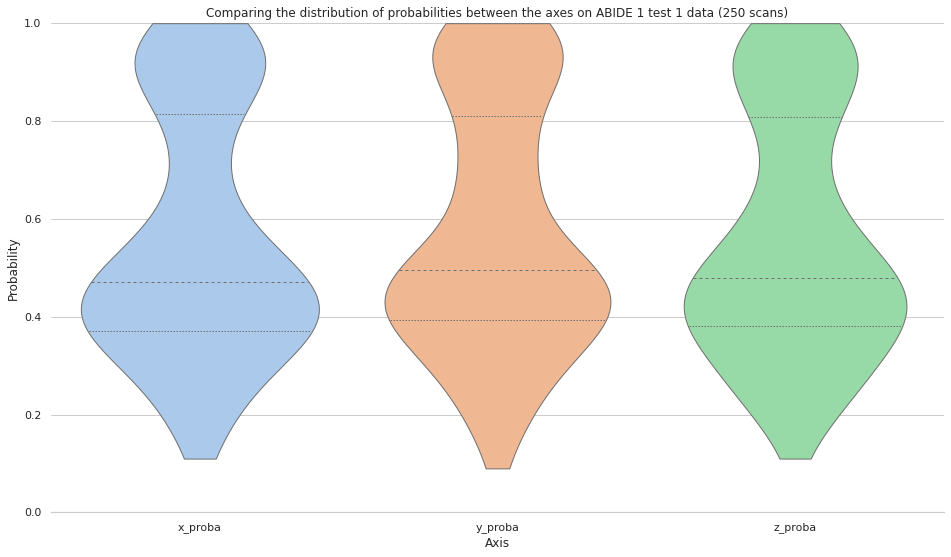

In [47]:
path = "results/protopnet/testset1/resnet152/19112020/10push0.8167.pth/"
df_group_test1 = pd.read_csv(os.path.join(path, "group_results.csv"))

# Distribution of x_proba, y_proba, z_proba
data = pd.melt(df_group_test1[['x_proba', 'y_proba', 'z_proba']])
plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid", palette="pastel")
sns.violinplot(data=data, x="variable", y="value",
               split=True, inner="quart", linewidth=1, cut=0)
sns.despine(left=True)
plt.title("Comparing the distribution of probabilities between the axes on ABIDE 1 test 1 data (250 scans)")
plt.xlabel("Axis")
plt.ylabel("Probability")
plt.ylim(0, 1)

df_group_test1["dataset"] = ["test1"]*df_group_test1.shape[0]

# Testset3 Good-Medium

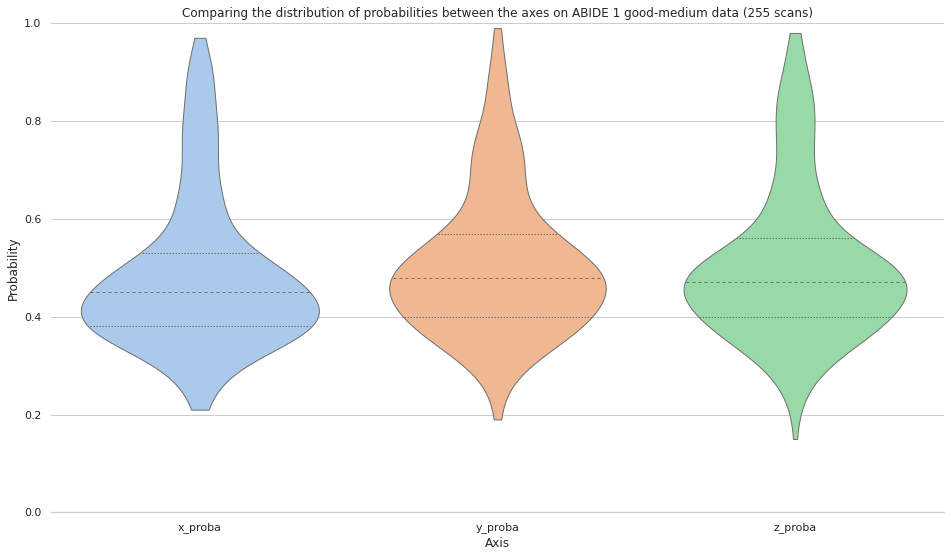

In [48]:
path = "results/protopnet/testset3_good_medium/resnet152/19112020/10push0.8167.pth/"
df_group_test3_good_medium = pd.read_csv(os.path.join(path, "group_results.csv"))

# Distribution of x_proba, y_proba, z_proba
data = pd.melt(df_group_test3_good_medium[['x_proba', 'y_proba', 'z_proba']])
plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid", palette="pastel")
sns.violinplot(data=data, x="variable", y="value",
               split=True, inner="quart", linewidth=1, cut=0)
sns.despine(left=True)
plt.title("Comparing the distribution of probabilities between the axes on ABIDE 1 good-medium data (255 scans)")
plt.xlabel("Axis")
plt.ylabel("Probability")
plt.ylim(0, 1)

df_group_test3_good_medium["dataset"] = ["test3_good_medium"]*df_group_test3_good_medium.shape[0]

# Testset3 Good

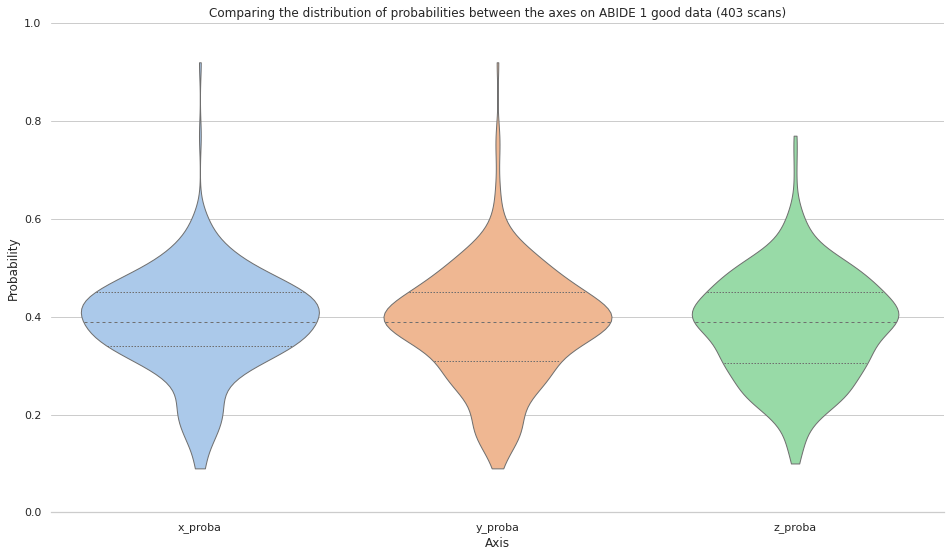

In [49]:
path1 = "results/protopnet/testset3_good_part1/resnet152/19112020/10push0.8167.pth/"
path2 = "results/protopnet/testset3_good_part2/resnet152/19112020/10push0.8167.pth/"
df_group_test3_good = pd.read_csv(os.path.join(path1, "group_results.csv"))
df_group_test3_good = pd.concat([df_group_test3_good, pd.read_csv(os.path.join(path2, "group_results.csv"))], axis=0, ignore_index=True)

# Distribution of x_proba, y_proba, z_proba
data = pd.melt(df_group_test3_good[['x_proba', 'y_proba', 'z_proba']])
plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid", palette="pastel")
sns.violinplot(data=data, x="variable", y="value",
               split=True, inner="quart", linewidth=1, cut=0)
sns.despine(left=True)
plt.title("Comparing the distribution of probabilities between the axes on ABIDE 1 good data (403 scans)")
plt.xlabel("Axis")
plt.ylabel("Probability")
plt.ylim(0, 1)

df_group_test3_good["dataset"] = ["test3_good"]*df_group_test3_good.shape[0]

# ABIDE 2

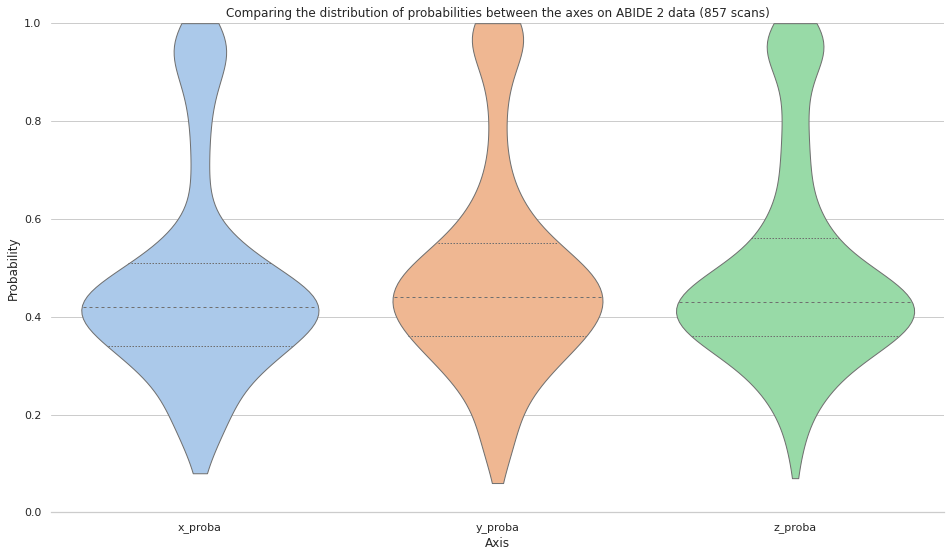

In [50]:
path = "results/protopnet/abide2/resnet152/19112020/10push0.8167.pth/"
df_group_abide2 = pd.read_csv(os.path.join(path, "group_results.csv"))

# Distribution of x_proba, y_proba, z_proba
data = pd.melt(df_group_abide2[['x_proba', 'y_proba', 'z_proba']])
plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid", palette="pastel")
sns.violinplot(data=data, x="variable", y="value",
               split=True, inner="quart", linewidth=1, cut=0)
sns.despine(left=True)
plt.title("Comparing the distribution of probabilities between the axes on ABIDE 2 data (857 scans)")
plt.xlabel("Axis")
plt.ylabel("Probability")
plt.ylim(0, 1)

df_group_abide2["dataset"] = ["abide2"]*df_group_abide2.shape[0]

# ABCD

In [51]:
df_abcd_true = pd.read_csv("results/protopnet/abcd_global_analysis_logs/downloaded_files_info.csv")
df_abcd_true["subid"] = df_abcd_true.filename.apply(lambda x: x.split(".")[0])

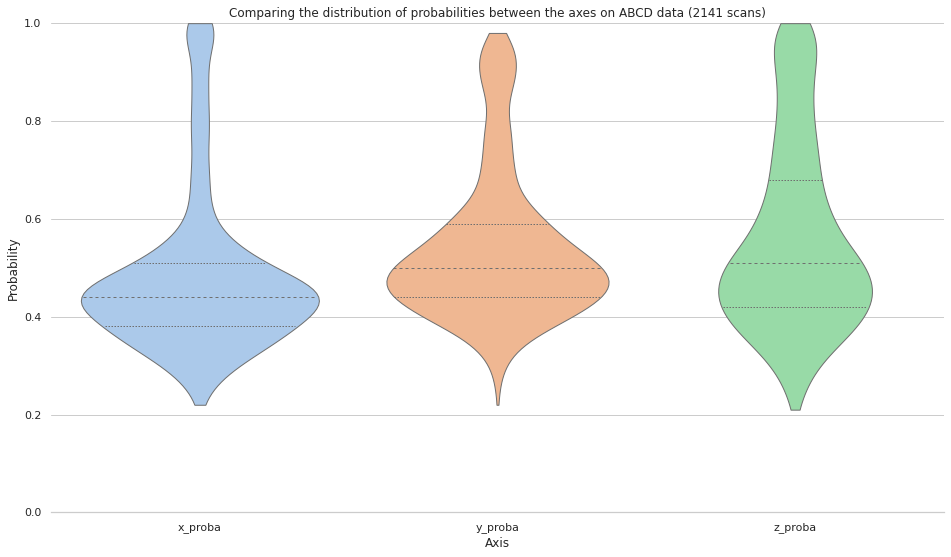

In [52]:
path = "results/protopnet/abcd_global_analysis_logs"

df_group_abcd = pd.read_csv(os.path.join(path, "group_results.csv"))

# Distribution of x_proba, y_proba, z_proba
data = pd.melt(df_group_abcd[['x_proba', 'y_proba', 'z_proba']])
plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid", palette="pastel")
sns.violinplot(data=data, x="variable", y="value",
               split=True, inner="quart", linewidth=1, cut=0)
sns.despine(left=True)
plt.title("Comparing the distribution of probabilities between the axes on ABCD data (2141 scans)")
plt.xlabel("Axis")
plt.ylabel("Probability")
plt.ylim(0, 1)

df_group_abcd["dataset"] = ["abcd"]*df_group_abcd.shape[0]

# All

In [53]:
df_group_all = pd.concat([df_group_train, df_group_val, df_group_test1, 
                          df_group_test3_good_medium, df_group_test3_good,
                          df_group_abide2, df_group_abcd], axis=0, ignore_index=True)

In [54]:
df_group_all.shape

(3978, 13)

In [55]:
subid = "UCLA-1-0051278"
df_group_all[df_group_all.subid == subid]

,subid,proba,t,slices,axes,x_proba,y_proba,z_proba,pred,x_pred,y_pred,z_pred,dataset
198,UCLA-1-0051278,0.63,30.79,"[6, 9, 10, 17, 18, 19, 20, 23, 26, 27, 28, 33,...","['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', ...",0.58,0.7,0.61,1.0,1.0,1.0,1.0,test1


In [56]:
df_group_all[df_group_all.subid == subid]["slices"].item()

'[6, 9, 10, 17, 18, 19, 20, 23, 26, 27, 28, 33, 34, 35, 36, 37, 38, 41, 43, 44, 45, 46, 47, 53, 54, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 86, 88, 89, 90, 91, 92, 93, 94, 98, 100, 101, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 122, 123, 127, 128, 139, 140, 141, 142, 143, 144, 145, 146, 151, 152, 153, 154, 158, 159, 0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 14, 15, 16, 17, 20, 21, 22, 24, 25, 27, 29, 32, 35, 36, 37, 40, 41, 43, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 63, 66, 70, 72, 80, 81, 82, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 108, 109, 111, 112, 114, 116, 118, 119, 120, 121, 125, 130, 131, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,

In [57]:
df_group_all[df_group_all.subid == subid]["axes"].item()

"['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y'

# Studying subids_globally_medium_damaged and subids_local_ringing_or_erasement

In [58]:
df_globally_medium_damaged = df_group_all[[x in subids_globally_medium_damaged for x in df_group_all.subid]]
df_globally_medium_damaged.shape

(51, 13)

In [59]:
df_local_ringing_or_erasement = df_group_all[[x in subids_local_ringing_or_erasement for x in df_group_all.subid]]
df_local_ringing_or_erasement.shape

(60, 13)

In [60]:
df_globally_bad = df_group_all[[x in subids_globally_bad for x in df_group_all.subid]]
df_globally_bad["damaged"] = ["globally damaged"]*df_globally_bad.shape[0]
df_globally_bad.shape

/tmp/ipykernel_26889/2085255763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_globally_bad["damaged"] = ["globally damaged"]*df_globally_bad.shape[0]


(36, 14)

In [61]:
df_other_annotated_precisely = df_group_all[[(x in all_subids_locally_annotated) & (x not in subids_globally_medium_damaged) & (x not in subids_local_ringing_or_erasement) & (x not in subids_globally_bad) for x in df_group_all.subid]]
df_other_annotated_precisely["damaged"] = ["other less damaged scans"]*df_other_annotated_precisely.shape[0]
df_other_annotated_precisely.shape

/tmp/ipykernel_26889/2717610255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_other_annotated_precisely["damaged"] = ["other less damaged scans"]*df_other_annotated_precisely.shape[0]


(269, 14)

In [62]:
df_other_annotated_precisely

,subid,proba,t,slices,axes,x_proba,y_proba,z_proba,pred,x_pred,y_pred,z_pred,dataset,damaged
72,Pitt-0050003,0.686667,35.51,"[2, 4, 7, 10, 17, 18, 22, 25, 26, 27, 28, 29, ...","['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', ...",0.66,0.80,0.60,1.0,1.0,1.0,1.0,test1,other less damaged scans
86,Stanford-0051182,0.460000,28.58,"[0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15...","['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', ...",0.57,0.43,0.38,0.0,1.0,0.0,0.0,test1,other less damaged scans
98,Yale-0050627,0.490000,28.81,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', ...",0.49,0.47,0.51,0.0,0.0,0.0,1.0,test1,other less damaged scans
115,Yale-0050577,0.486667,30.97,"[0, 1, 2, 3, 4, 7, 10, 11, 12, 13, 16, 17, 18,...","['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', ...",0.44,0.55,0.47,0.0,0.0,1.0,0.0,test1,other less damaged scans
119,Leuven-2-0050750,0.823333,33.70,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16,...","['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', ...",0.75,0.81,0.91,1.0,1.0,1.0,1.0,test1,other less damaged scans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,UM-1-0050291,0.433333,25.17,"[1, 2, 3, 4, 5, 13, 17, 19, 21, 24, 25, 26, 27...","['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', ...",0.37,0.44,0.49,0.0,0.0,0.0,0.0,test3_good_medium,other less damaged scans
573,NYU-0051058,0.430000,28.21,"[0, 1, 2, 6, 7, 8, 9, 10, 11, 12, 15, 16, 17, ...","['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', ...",0.53,0.40,0.36,0.0,1.0,0.0,0.0,test3_good_medium,other less damaged scans
574,NYU-0050997,0.463333,30.99,"[3, 4, 8, 12, 17, 20, 27, 29, 31, 32, 33, 35, ...","['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', ...",0.41,0.57,0.41,0.0,0.0,1.0,0.0,test3_good_medium,other less damaged scans
575,Leuven-2-0050744,0.876667,31.86,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', ...",0.91,0.81,0.91,1.0,1.0,1.0,1.0,test3_good_medium,other less damaged scans


In [63]:
set(subids_local_ringing_or_erasement).difference(set(df_group_all.subid))

{'Stanford-0051169',
 'Stanford-0051171',
 'Stanford-0051181',
 'Stanford-0051184',
 'UM-1-0050290',
 'UM-1-0050296'}

In [64]:
df_globally_medium_damaged.proba.describe()

count    51.000000
mean      0.886078
std       0.103386
min       0.586667
25%       0.865000
50%       0.930000
75%       0.948333
max       0.986667
Name: proba, dtype: float64

In [65]:
df_local_ringing_or_erasement.proba.describe()

count    60.000000
mean      0.673056
std       0.186635
min       0.370000
25%       0.508333
50%       0.628333
75%       0.841667
max       0.986667
Name: proba, dtype: float64

In [66]:
df_local_ringing_or_erasement["damaged"] = ["local_ringing_or_erasement"]*df_local_ringing_or_erasement.shape[0]
df_globally_medium_damaged["damaged"] = ["globally_medium_damaged"]*df_globally_medium_damaged.shape[0]

/tmp/ipykernel_26889/1370030279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_local_ringing_or_erasement["damaged"] = ["local_ringing_or_erasement"]*df_local_ringing_or_erasement.shape[0]
/tmp/ipykernel_26889/1370030279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_globally_medium_damaged["damaged"] = ["globally_medium_damaged"]*df_globally_medium_damaged.shape[0]


Text(0.5, 1.0, 'Comparing the distribution of probabilities between different levels of intensities among scans precisely annotated with artefacts (51+60+36+269 scans)')

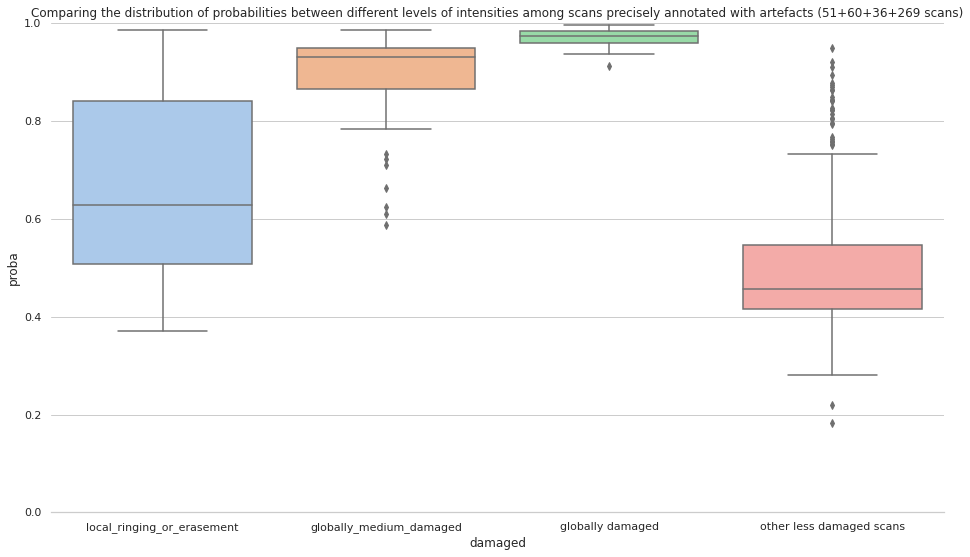

In [67]:
data = pd.concat([df_local_ringing_or_erasement[["damaged", "proba", "x_proba", "y_proba", "z_proba"]], 
                  df_globally_medium_damaged[["damaged", "proba", "x_proba", "y_proba", "z_proba"]],
                  df_globally_bad[["damaged", "proba", "x_proba", "y_proba", "z_proba"]],
                  df_other_annotated_precisely[["damaged", "proba", "x_proba", "y_proba", "z_proba"]]],
                axis=0)

plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid", palette="pastel")
sns.boxplot(data=data, x="damaged", y="proba")
sns.despine(left=True)
plt.ylim(0,1)
plt.title("Comparing the distribution of probabilities between different levels of intensities among scans precisely annotated with artefacts (51+60+36+269 scans)")